In [48]:
###### run this to download and unzip the data
# import kaggle
# !kaggle competitions download -c titanic

# unzip files
# !unzip titanic.zip
######
# packages

# Exploratory Data Analisys

In this notebook we'll do an Exploratory Data Analisys (EDA). This is an important part of a modelling process. An EDA process can give us many insights about data, its distribution, data quality, dependency relationship, and many other specifities of a dataset. 

In the case of the Titanic competition an EDA process will be use to understand how the variables are related to eachother and, as a consequence, do a feature selection. There'no a standart way to do an EDA and its analisys depends of the data which its been applied.

**Preliminaries**

- Probability
- Linear model
- Design Experiments
- Analisys of Variance

In [50]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load dataset
df = pd.read_csv("train.csv")

# Data descrition

The data description is shown on the following table.

| Variable 	|                 Definition                 	|                       Key                      	|
|:--------:	|:------------------------------------------:	|:----------------------------------------------:	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| number of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| number of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|




In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploring data

A very important step to do in a modelling process refers to check the quality of data. This is a subject that have multiple meanings, but here lets consider only the amount of missing data on each feature. 

In [39]:
for column in df.columns:
    print(f"{column}: {df[column].isna().sum()}")

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


There are some missing values on features Age, Cabin and Embarked. For now, we gonna worry only about the Age variable and fill its NaN's with your own average. This is not the best way to solve this problem, but for now it is enough (on the notebook of pre processing data another methodology will be used).  

In [40]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

As we can see on data dictionary, maybe there are some dependency relationship between some variables that worth to be checked. For example, it would be pretty expected if the passenger fare is correlated with the Pclass variable, once it is corresponded to the quality of the rooms. As a direct consequence, it is possible that the passengers from the first class has a hight probability of survive. Let's check it out.

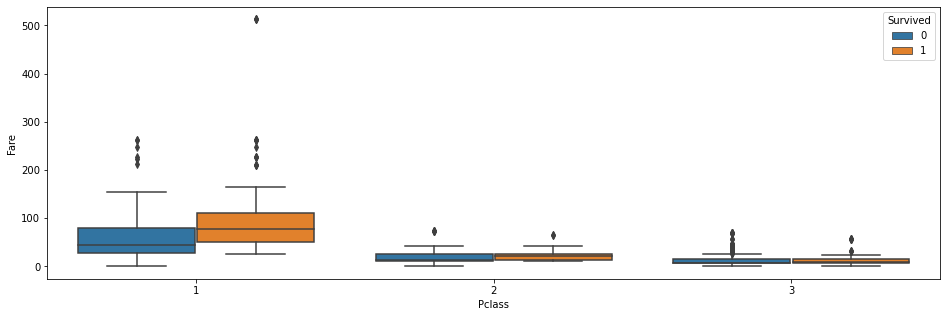

In [51]:
# Plotting the variance
fig, ax = plt.subplots(figsize=[16, 5])
sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=df);

As we can see on the boxplots above, there are strong clues to believe that passengers from classes which has higher fare values have more chances to survive. So, Let's calculate it!

In [42]:
classes = np.sort(df["Pclass"].unique())
for pc in classes:
    filt = df["Pclass"] == pc
    prob = df.loc[filt, "Survived"].sum() / len(df[filt])
    print(
        f"The passenger survival probability from class {pc} is {np.round(prob, 4)}. \n"
    )

The probability of a passenger from class 1 to survive is 0.6296. 

The probability of a passenger from class 2 to survive is 0.4728. 

The probability of a passenger from class 3 to survive is 0.2424. 



A more appropriated way to check it is thrgouth an analisys of variance:

In [43]:
# importing methods
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Splitting classes
c1 = df.loc[df["Pclass"] == 1, "Survived"]
c2 = df.loc[df["Pclass"] == 2, "Survived"]
c3 = df.loc[df["Pclass"] == 3, "Survived"]

# Anova one way
f_oneway(c1, c2, c3)

F_onewayResult(statistic=57.964817590910116, pvalue=2.1832474151179777e-24)

By the p value we have sufficient evidence to say that the mean values across each class are not equal. Let's check closer through the Tukey test.

In [44]:
df["Age"].fillna(df["Age"].mean(), inplace=True)
tukey = pairwise_tukeyhsd(endog=df["Survived"], groups=df["Pclass"], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.1568 0.0019 -0.2647 -0.0489   True
     1      3  -0.3873  0.001 -0.4751 -0.2994   True
     2      3  -0.2305  0.001 -0.3234 -0.1375   True
----------------------------------------------------


Indeed, the variable class is an important feature to predict if a passenger survives or not in this problem, just like the variable fare value is. 

There are other features which has more intuitive surviving relationship, such as the sex and the age. Thus, many questions can arise, such as:
- Given a pclass, there is a tendency for people of one sex to survive longer than another?
- Given a pclass, is age an important feature to predict the survivors?

Lets check it!

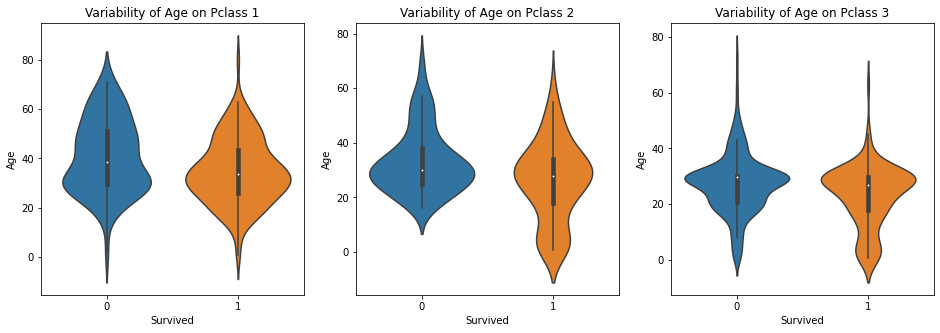

In [45]:
fig, ax = plt.subplots(1, 3, figsize=[16, 5])

# Plotting variances and distributions
for plot, pclass in enumerate(classes):
    filt = df["Pclass"] == pclass
    sns.violinplot(x="Survived", y="Age", data=df[filt], ax=ax[plot])
    ax[plot].set_title(f"Variability of Age on Pclass {pclass}")

I like a lot to use violing plots instead of boxplots because it also brings more distribution information than the boxplots. The Figure above shows us something very subtle. First, younger people has a higher probabilty of survival. But, the average of the survivors age is higher if the Pclass is lower. This means that if you were one of those people who were on the first class, you didn't have to be so young to survive, and this is a fact that reforces our first belief. Let's do the same with the Sex variable.

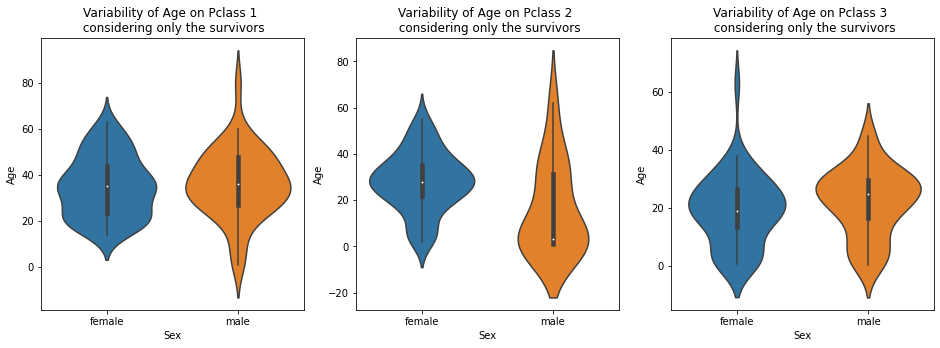

In [52]:
# Plotting variances
fig, ax = plt.subplots(1, 3, figsize=[16, 5])
classes = np.sort(df["Pclass"].unique())
for plot, pclass in enumerate(classes):
    filt = (df["Pclass"] == pclass) & (df["Survived"] == 1)
    sns.violinplot(x="Sex", y="Age", data=df[filt], ax=ax[plot])
    ax[plot].set_title(
        f"Variability of Age on Pclass {pclass} \n considering only the survivors"
    )

Splitting the survivors only by the Pclass and Sex, it looks like there's no difference bettween males and females to precict the survival probability. But, the best way to do that is, under some linearity asumptions, check it thrghout a F test. To test the effect of all of this features together it is appropriate to build a factorial experiment in randomized blocks, like

$$
    Age_{i,j,k} = \mu + a_i + b_j +  ab_{i,j} + c_k + \epsilon_{ijk}
$$

where

- $a_i$: the i level effect from the sex variable;
- $b_j$: the j level effect from the class variable;
- $ab_{ij}$: the interaction effect of i level from A factor with the j level from B factor;
- $c_k$: the effect of k block, in this case, survived or not.
- $\epsilon_{i,j,k}$: experimental error associated with $Age_{i,j,k}$, which is random, have homogeneous variance and is normal distributed with mean equal to zero ($\epsilon_{i,j,k} \sim \mathcal{N}(0, \sigma^2)$)

In [55]:
# importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols("Age ~ C(Sex) + C(Pclass) + C(Sex)*C(Pclass) + C(Survived)", data=df).fit()
anova_table = sm.stats.anova_lm(m)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Sex),1.0,1308.405450,1308.405450,7.663397,5.782773e-03
C(Pclass),2.0,23010.355131,11505.177566,67.386404,1.634437e-27
C(Survived),1.0,4360.534586,4360.534586,25.539871,5.523767e-07
C(Sex):C(Pclass),2.0,1068.117599,534.058799,3.128009,4.441176e-02
Residual,707.0,120709.223178,170.734403,NaN,NaN


First things first, as expected the factor Pclass has statistical significance over all the treatments (Sex and Survived). Beyound that, all of those features presented statistical mean difference according to the F test, with $\alpha = 1\%$. Now we have strong evidences to believe that all of those features have its own importance to predict the survivors.

The features Cabin, Embarked, Name, Ticket have no importance in this problem and because of this, they will be dropped in the modelling process. All the features lefting (SibSp and Parch) will be keeped in the set of predictors, but they will be not studied here. Feel free to do it!!